In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as f 
from torch.autograd import Variable
torch.backends.cudnn.deterministic = True
import pandas as pd
import numpy as np
import torch.utils.data as data_utils
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random 
from matplotlib import pyplot as plt
from sklearn import decomposition
from sklearn import manifold
from scipy import stats
from itertools import cycle
import sys
import utilities as ut
from Network import Net
import Network as nn
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
import matplotlib

matplotlib.rcParams["figure.dpi"] = 100


use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

#ab y c con 3000 samples, 256 batch y 10000 objetos. 

results = []
num_classes = 2
learning_rate = 0.001
samples = 3000 #
epsilon=0
#for epsilon in [0.1, 0.05, 0.025, 0.15]:
for sc in ['_RRc']: #,'_RRc','_RRab'
    for batch_size in [256]:
        for hidden_size in [100]:
            for aux_loss_activated in [False]:
                for EPS1 in [0.005]:
                    for n in [10000]:
                        for opt in [1]:
                            for t in range(15):
                                train_dataset, test_dataset = ut.load_files(dataset=1, subclass=sc)
                                input_size = train_dataset.shape[1]-1

                                if n < 50000:
                                    train_dataset = ut.down_sampling(train_dataset)
                                    train_dataset = train_dataset.sample(n)
                                    print(train_dataset)
                                else: 
                                    trainig_dataset_a = train_dataset[train_dataset.label=='ClassA']
                                    print('shape: ', trainig_dataset_a.shape[0])
                                    n2 = n - trainig_dataset_a.shape[0]
                                    print('clase no RR Lrae', n2)
                                    trainig_dataset_b = train_dataset[~(train_dataset.label=='ClassA')].sample(n2)
                                    train_dataset = pd.concat([trainig_dataset_a, trainig_dataset_b])

                                train_dataset, test_dataset = ut.delete_outliers(train_dataset, test_dataset)

                                train_dataset = ut.sort_columns(train_dataset)
                                test_dataset = ut.sort_columns(test_dataset)

                                test_dataset_pred = test_dataset.copy()
                                train_dataset_pred = train_dataset.copy()

                                try:
                                    data_prior = ut.generate_samples_2D(samples, train_dataset, distribution='uniform')

                                    train_dataset, val_dataset = train_test_split(train_dataset, test_size=0.1, random_state=42)

                                    train_dataset_prior, val_dataset_prior = train_test_split(data_prior, test_size=0.1, random_state=42)
                                    print(train_dataset_prior.columns)
                                    _, _, train_target_prior, train_loader_prior = ut.get_tensors(train_dataset_prior, batch_size)
                                    _, _, val_target_prior, val_loader_prior     = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, train_target, train_loader             = ut.get_tensors(train_dataset, batch_size)
                                    _, _, train_target_pred, train_loader_pred   = ut.get_tensors(train_dataset_pred, batch_size)
                                    _, _, val_target, val_loader                 = ut.get_tensors(val_dataset_prior, batch_size)
                                    _, _, test_target, test_loader               = ut.get_tensors(test_dataset, batch_size)
                                    _, _, test_target_pred, test_loader_pred     = ut.get_tensors(test_dataset_pred, batch_size)

                                    net = Net(input_size, hidden_size, hidden_size, num_classes)
                                    net.cuda()

                                    hist_val, hist_train = nn.train(net, train_loader, train_loader_prior, val_loader, test_loader,
                                    EPS1, learning_rate, input_size, aux_loss_activated=aux_loss_activated, patience=20)

                                    acc_train, recall_train, f1_train = nn.get_results(net, train_loader, input_size)
                                    acc_test, recall_test, f1_test  = nn.get_results(net, test_loader, input_size)
                                    roc_train = nn.get_roc_curve(net, train_loader, input_size)
                                    roc_test = nn.get_roc_curve(net, test_loader, input_size)
                                    results.append([acc_train, acc_test,recall_train, recall_test, f1_train, f1_test, roc_train, roc_test, epsilon, batch_size, hidden_size, aux_loss_activated, EPS1, n, opt, sc])
                                    pd.DataFrame(results, columns=['acc_train', 'acc_test','recall_train', 'recall_test','f1_train', 'f1_test', 
                                                                   'roc_train', 'roc_test', 'epsilon', 'batch_size', 'hidden_size',
                                     'aux_loss_activated', 'EPS1', 'n', 'opt', 'sc']).to_csv('rrc_subclasses__21-05-2022-baseline.csv')
                                except Exception as e:
                                    print(e) 
                                    print(str(batch_size)+"-"+str(hidden_size)+"-"+str(aux_loss_activated)+"-"+str(EPS1))

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/franciscoperez/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/franciscoperez/anacon

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
196485    0.12700         0.000000               1    0.483051   26.818992   
199313    0.25900         0.744689               1    0.305556   56.942133   
388409    0.05600         0.000124               3    0.303333  417.606785   
259382    0.11225         0.000482               1    0.396040   38.104956   
80743     0.21950         0.000000               1    0.376667  175.966180   
...           ...              ...             ...         ...         ...   
164128    0.20000         0.000000               1    0.357143   26.563713   
119982    0.18650         0.000001               1    0.386667  297.507317   
204213    0.18300         0.000000               1    0.436667   45.493807   
347732    0.22800         0.000001               1    0.376667   30.448837   
121346    0.102

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Epochs:  1000
Epoch:  0
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  1  loss:  17.168867766857147 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.310580283403397 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.35739341378212 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.189045190811157 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  11.63335806131363 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.456441313028336 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.294640243053436 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.123584389686584 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_v

training: epoch:  44  loss:  10.32390695810318 -- aux loss:  0.0
Epoch:  44
the_last_loss:  0.9155679941177368
running_loss_val:  0.9155679941177368
training: epoch:  45  loss:  10.416322231292725 -- aux loss:  0.0
Epoch:  45
the_last_loss:  0.9155679941177368
running_loss_val:  0.9155679941177368
training: epoch:  46  loss:  10.365732640028 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.9155679941177368
running_loss_val:  0.9155679941177368
training: epoch:  47  loss:  10.295829683542252 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.9155679941177368
running_loss_val:  0.9155679941177368
training: epoch:  48  loss:  10.352087378501892 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.9155679941177368
running_loss_val:  0.9155679941177368
training: epoch:  49  loss:  10.389415562152863 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.9155679941177368
running_loss_val:  0.9155679941177368
training: epoch:  50  loss:  10.3745157122612 -- aux loss:  0.0
the_last_loss:  0.9155679941177368
runni

training: epoch:  88  loss:  10.373343884944916 -- aux loss:  0.0
Epoch:  88
the_last_loss:  1.1033564805984497
running_loss_val:  1.1033564805984497
training: epoch:  89  loss:  10.448525816202164 -- aux loss:  0.0
Epoch:  89
the_last_loss:  1.1033564805984497
running_loss_val:  1.1033564805984497
training: epoch:  90  loss:  10.33570221066475 -- aux loss:  0.0
the_last_loss:  1.1033564805984497
running_loss_val:  1.137918472290039
validating: epoch:  90  loss:  1.137918472290039
The current loss: 1.137918472290039
the_last_loss: 1.1033564805984497
trigger times: 9
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
Epoch:  90
the_last_loss:  1.137918472290039
running_loss_val:  1.137918472290039
training: epoch:  91  loss:  10.495759278535843 -- 

training: epoch:  130  loss:  10.325260668992996 -- aux loss:  0.0
the_last_loss:  1.2101497650146484
running_loss_val:  1.2277123928070068
validating: epoch:  130  loss:  1.2277123928070068
The current loss: 1.2277123928070068
the_last_loss: 1.2101497650146484
trigger times: 13
sum mask2 - L1:  tensor(5784, device='cuda:0')
sum mask2 - L2:  tensor(9475, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(216, device='cuda:0')
sum mask1 - L2 (aux):  tensor(525, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9, device='cuda:0')
Epoch:  130
the_last_loss:  1.2277123928070068
running_loss_val:  1.2277123928070068
training: epoch:  131  loss:  10.161781996488571 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.2277123928070068
running_loss_val:  1.2277123928070068
training: epoch:  132  loss:  10.256374269723892 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.2277123928070068
running_loss_val:  1.2277123928070068
training: epoch:  133  loss:  10.2742

training: epoch:  172  loss:  10.513536959886551 -- aux loss:  0.0
Epoch:  172
the_last_loss:  1.275517225265503
running_loss_val:  1.275517225265503
training: epoch:  173  loss:  10.35287755727768 -- aux loss:  0.0
Epoch:  173
the_last_loss:  1.275517225265503
running_loss_val:  1.275517225265503
training: epoch:  174  loss:  10.299662113189697 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.275517225265503
running_loss_val:  1.275517225265503
training: epoch:  175  loss:  10.094625502824783 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.275517225265503
running_loss_val:  1.275517225265503
training: epoch:  176  loss:  10.284447878599167 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.275517225265503
running_loss_val:  1.275517225265503
training: epoch:  177  loss:  10.229081779718399 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.275517225265503
running_loss_val:  1.275517225265503
training: epoch:  178  loss:  10.435167014598846 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2755

<Figure size 640x480 with 1 Axes>

0.9707


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
146923     0.0815         0.002236               3    0.337931    5.170635   
36468      0.1305         0.000000               1    0.460000   18.662028   
351246     0.1995         0.000591               1    0.350000   51.373365   
172127     0.0165         0.221630               2    0.313333   16.622781   
197605     0.0135         0.442899               1    0.315508   71.533763   
...           ...              ...             ...         ...         ...   
165862     0.0295         0.029211              11    0.343333  170.170512   
358962     0.1265         0.000000               1    0.398058   36.212825   
329442     0.0445         0.108572               2    0.353333  558.376100   
149285     0.0720         0.001013              14    0.380000    0.251322   
223569     0.20

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  20.96007412672043 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  15.835349351167679 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  14.103686720132828 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.925638258457184 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.486657738685608 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.838710844516754 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.858065515756607 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.358591347932816 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.167291015386581 -- aux los

training: epoch:  45  loss:  10.547075867652893 -- aux loss:  0.0
Epoch:  45
the_last_loss:  0.7795608043670654
running_loss_val:  0.7795608043670654
training: epoch:  46  loss:  10.635538071393967 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.7795608043670654
running_loss_val:  0.7795608043670654
training: epoch:  47  loss:  10.57965961098671 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.7795608043670654
running_loss_val:  0.7795608043670654
training: epoch:  48  loss:  10.417200863361359 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.7795608043670654
running_loss_val:  0.7795608043670654
training: epoch:  49  loss:  10.399864107370377 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.7795608043670654
running_loss_val:  0.7795608043670654
training: epoch:  50  loss:  10.42090767621994 -- aux loss:  0.0
the_last_loss:  0.7795608043670654
running_loss_val:  0.805141270160675
validating: epoch:  50  loss:  0.805141270160675
The current loss: 0.805141270160675
the_last_loss: 0.779560804367

training: epoch:  87  loss:  10.529754728078842 -- aux loss:  0.0
Epoch:  87
the_last_loss:  0.9564293026924133
running_loss_val:  0.9564293026924133
training: epoch:  88  loss:  10.471326291561127 -- aux loss:  0.0
Epoch:  88
the_last_loss:  0.9564293026924133
running_loss_val:  0.9564293026924133
training: epoch:  89  loss:  10.339957624673843 -- aux loss:  0.0
Epoch:  89
the_last_loss:  0.9564293026924133
running_loss_val:  0.9564293026924133
training: epoch:  90  loss:  10.333015441894531 -- aux loss:  0.0
the_last_loss:  0.9564293026924133
running_loss_val:  1.019145131111145
validating: epoch:  90  loss:  1.019145131111145
The current loss: 1.019145131111145
the_last_loss: 0.9564293026924133
trigger times: 9
sum mask2 - L1:  tensor(5777, device='cuda:0')
sum mask2 - L2:  tensor(9473, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(223, device='cuda:0')
sum mask1 - L2 (aux):  tensor(527, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11

training: epoch:  129  loss:  10.352368503808975 -- aux loss:  0.0
Epoch:  129
the_last_loss:  1.1654928922653198
running_loss_val:  1.1654928922653198
training: epoch:  130  loss:  10.263864040374756 -- aux loss:  0.0
the_last_loss:  1.1654928922653198
running_loss_val:  1.205368161201477
validating: epoch:  130  loss:  1.205368161201477
The current loss: 1.205368161201477
the_last_loss: 1.1654928922653198
trigger times: 13
sum mask2 - L1:  tensor(5777, device='cuda:0')
sum mask2 - L2:  tensor(9473, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(223, device='cuda:0')
sum mask1 - L2 (aux):  tensor(527, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
Epoch:  130
the_last_loss:  1.205368161201477
running_loss_val:  1.205368161201477
training: epoch:  131  loss:  10.158011019229889 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.205368161201477
running_loss_val:  1.205368161201477
training: epoch:  132  loss:  10.6038333475

training: epoch:  172  loss:  9.972893863916397 -- aux loss:  0.0
Epoch:  172
the_last_loss:  1.2812941074371338
running_loss_val:  1.2812941074371338
training: epoch:  173  loss:  9.780669748783112 -- aux loss:  0.0
Epoch:  173
the_last_loss:  1.2812941074371338
running_loss_val:  1.2812941074371338
training: epoch:  174  loss:  10.062656879425049 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.2812941074371338
running_loss_val:  1.2812941074371338
training: epoch:  175  loss:  9.948151379823685 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2812941074371338
running_loss_val:  1.2812941074371338
training: epoch:  176  loss:  9.840707629919052 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2812941074371338
running_loss_val:  1.2812941074371338
training: epoch:  177  loss:  9.863161534070969 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2812941074371338
running_loss_val:  1.2812941074371338
training: epoch:  178  loss:  9.744176000356674 -- aux loss:  0.0
Epoch:  178
the_last_loss: 

<Figure size 640x480 with 1 Axes>

0.9664


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
67256      0.1625         0.000000               1    0.403333  336.793508   
169820     0.2195         0.000000               1    0.376667  130.385380   
87936      0.1275         0.000000               1    0.468750   20.404182   
177148     0.1980         0.000691               1    0.343333   45.862451   
18586      0.2725         0.039981               1    0.360000    8.745429   
...           ...              ...             ...         ...         ...   
221840     0.0445         0.003780               4    0.320000   17.960038   
360965     0.2560         0.000925               1    0.343333  175.011425   
307504     0.1665         0.000000               1    0.393333   30.618764   
267722     0.0205         0.023024               2    0.290000   27.499440   
256158     0.21

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


shape tensor:  torch.Size([22840, 60])
____get_tensor_function____
shape tensor:  torch.Size([22840, 60])
Epochs:  1000
Epoch:  0
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  1  loss:  16.51627469062805 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.173167824745178 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  12.97823441028595 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.205086767673492 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  11.87480914592743 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.73426666855812 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.350119978189468 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
train

training: epoch:  44  loss:  10.411861419677734 -- aux loss:  0.0
Epoch:  44
the_last_loss:  0.8789858222007751
running_loss_val:  0.8789858222007751
training: epoch:  45  loss:  10.45757582783699 -- aux loss:  0.0
Epoch:  45
the_last_loss:  0.8789858222007751
running_loss_val:  0.8789858222007751
training: epoch:  46  loss:  10.306165933609009 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.8789858222007751
running_loss_val:  0.8789858222007751
training: epoch:  47  loss:  10.301434248685837 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8789858222007751
running_loss_val:  0.8789858222007751
training: epoch:  48  loss:  10.342209726572037 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8789858222007751
running_loss_val:  0.8789858222007751
training: epoch:  49  loss:  10.392385482788086 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8789858222007751
running_loss_val:  0.8789858222007751
training: epoch:  50  loss:  10.355568557977676 -- aux loss:  0.0
the_last_loss:  0.8789858222007751


training: epoch:  87  loss:  10.464925646781921 -- aux loss:  0.0
Epoch:  87
the_last_loss:  1.0312705039978027
running_loss_val:  1.0312705039978027
training: epoch:  88  loss:  10.414645284414291 -- aux loss:  0.0
Epoch:  88
the_last_loss:  1.0312705039978027
running_loss_val:  1.0312705039978027
training: epoch:  89  loss:  10.605978339910507 -- aux loss:  0.0
Epoch:  89
the_last_loss:  1.0312705039978027
running_loss_val:  1.0312705039978027
training: epoch:  90  loss:  11.196491450071335 -- aux loss:  0.0
the_last_loss:  1.0312705039978027
running_loss_val:  1.086592435836792
validating: epoch:  90  loss:  1.086592435836792
The current loss: 1.086592435836792
the_last_loss: 1.0312705039978027
trigger times: 9
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9447, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(553, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10

training: epoch:  129  loss:  10.818550944328308 -- aux loss:  0.0
Epoch:  129
the_last_loss:  1.15290367603302
running_loss_val:  1.15290367603302
training: epoch:  130  loss:  10.316136002540588 -- aux loss:  0.0
the_last_loss:  1.15290367603302
running_loss_val:  1.1704713106155396
validating: epoch:  130  loss:  1.1704713106155396
The current loss: 1.1704713106155396
the_last_loss: 1.15290367603302
trigger times: 13
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9447, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(553, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
Epoch:  130
the_last_loss:  1.1704713106155396
running_loss_val:  1.1704713106155396
training: epoch:  131  loss:  10.362457126379013 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.1704713106155396
running_loss_val:  1.1704713106155396
training: epoch:  132  loss:  11.46633833646

training: epoch:  170  loss:  10.193732768297195 -- aux loss:  0.0
the_last_loss:  1.2180533409118652
running_loss_val:  1.2342581748962402
validating: epoch:  170  loss:  1.2342581748962402
The current loss: 1.2342581748962402
the_last_loss: 1.2180533409118652
trigger times: 17
sum mask2 - L1:  tensor(5779, device='cuda:0')
sum mask2 - L2:  tensor(9447, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(221, device='cuda:0')
sum mask1 - L2 (aux):  tensor(553, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
Epoch:  170
the_last_loss:  1.2342581748962402
running_loss_val:  1.2342581748962402
training: epoch:  171  loss:  10.15532636642456 -- aux loss:  0.0
Epoch:  171
the_last_loss:  1.2342581748962402
running_loss_val:  1.2342581748962402
training: epoch:  172  loss:  10.19108372926712 -- aux loss:  0.0
Epoch:  172
the_last_loss:  1.2342581748962402
running_loss_val:  1.2342581748962402
training: epoch:  173  loss:  10.19326

<Figure size 640x480 with 1 Axes>

0.9996


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
332850    0.15325         0.000000               1    0.403361   29.491234   
287249    0.16100         0.143597               1    0.346667   36.199933   
353308    0.01650         0.220203               1    0.296667   33.718208   
116663    0.21650         0.012933               1    0.321070   35.996497   
331004    0.02000         0.000141               8    0.316667   57.327022   
...           ...              ...             ...         ...         ...   
86674     0.21650         0.001088               1    0.322917   22.058020   
91120     0.10850         0.163252               3    0.270000   89.010040   
116528    0.21850         0.003863               1    0.333333  121.327011   
141710    0.21850         0.237931               1    0.305263  240.489332   
99217     0.011

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  17.29664608836174 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.181145071983337 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.117030769586563 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.571928143501282 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.025649815797806 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.72603103518486 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.366770833730698 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.28813150525093 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.299490451812744 -- aux loss:

training: epoch:  46  loss:  10.49087405204773 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.8746275305747986
running_loss_val:  0.8746275305747986
training: epoch:  47  loss:  10.6463543176651 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8746275305747986
running_loss_val:  0.8746275305747986
training: epoch:  48  loss:  10.475624859333038 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8746275305747986
running_loss_val:  0.8746275305747986
training: epoch:  49  loss:  10.6473368704319 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8746275305747986
running_loss_val:  0.8746275305747986
training: epoch:  50  loss:  10.49721246957779 -- aux loss:  0.0
the_last_loss:  0.8746275305747986
running_loss_val:  0.907278299331665
validating: epoch:  50  loss:  0.907278299331665
The current loss: 0.907278299331665
the_last_loss: 0.8746275305747986
trigger times: 5
sum mask2 - L1:  tensor(5760, device='cuda:0')
sum mask2 - L2:  tensor(9519, device='cuda:0')
sum mask2 - L3:  tensor(190, device='c

training: epoch:  89  loss:  10.383730471134186 -- aux loss:  0.0
Epoch:  89
the_last_loss:  1.013472080230713
running_loss_val:  1.013472080230713
training: epoch:  90  loss:  10.610911577939987 -- aux loss:  0.0
the_last_loss:  1.013472080230713
running_loss_val:  1.0561164617538452
validating: epoch:  90  loss:  1.0561164617538452
The current loss: 1.0561164617538452
the_last_loss: 1.013472080230713
trigger times: 9
sum mask2 - L1:  tensor(5760, device='cuda:0')
sum mask2 - L2:  tensor(9519, device='cuda:0')
sum mask2 - L3:  tensor(190, device='cuda:0')
sum mask1 - L1 (aux):  tensor(240, device='cuda:0')
sum mask1 - L2 (aux):  tensor(481, device='cuda:0')
sum mask1 - L3 (aux):  tensor(10, device='cuda:0')
Epoch:  90
the_last_loss:  1.0561164617538452
running_loss_val:  1.0561164617538452
training: epoch:  91  loss:  10.676057189702988 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.0561164617538452
running_loss_val:  1.0561164617538452
training: epoch:  92  loss:  10.482959747314453 

training: epoch:  131  loss:  10.495227217674255 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.2321715354919434
running_loss_val:  1.2321715354919434
training: epoch:  132  loss:  10.403939217329025 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.2321715354919434
running_loss_val:  1.2321715354919434
training: epoch:  133  loss:  10.337967544794083 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.2321715354919434
running_loss_val:  1.2321715354919434
training: epoch:  134  loss:  10.302642196416855 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.2321715354919434
running_loss_val:  1.2321715354919434
training: epoch:  135  loss:  10.255905717611313 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.2321715354919434
running_loss_val:  1.2321715354919434
training: epoch:  136  loss:  10.120533645153046 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.2321715354919434
running_loss_val:  1.2321715354919434
training: epoch:  137  loss:  10.172543704509735 -- aux loss:  0.0
Epoch:  137
the_last_

training: epoch:  173  loss:  9.967141717672348 -- aux loss:  0.0
Epoch:  173
the_last_loss:  1.2990851402282715
running_loss_val:  1.2990851402282715
training: epoch:  174  loss:  9.985410004854202 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.2990851402282715
running_loss_val:  1.2990851402282715
training: epoch:  175  loss:  10.220249742269516 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2990851402282715
running_loss_val:  1.2990851402282715
training: epoch:  176  loss:  9.909542441368103 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2990851402282715
running_loss_val:  1.2990851402282715
training: epoch:  177  loss:  10.217718660831451 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2990851402282715
running_loss_val:  1.2990851402282715
training: epoch:  178  loss:  9.836681813001633 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2990851402282715
running_loss_val:  1.2990851402282715
training: epoch:  179  loss:  9.641795873641968 -- aux loss:  0.0
Epoch:  179
the_last_loss:

<Figure size 640x480 with 1 Axes>

0.9943


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
186491    0.12675         0.000000               1    0.463636   47.944777   
384879    0.06100         0.341620               2    0.306202   25.292678   
293915    0.19650         0.000000               1    0.356667   58.949304   
129335    0.20250         0.000001               1    0.343333   78.106117   
154866    0.17050         0.000021               1    0.386667  112.211192   
...           ...              ...             ...         ...         ...   
167952    0.01400         0.174296               1    0.293333   54.011079   
275486    0.20300         0.000001               1    0.336667   69.727293   
309541    0.06000         0.000008               1    0.376667   72.756288   
149216    0.01300         0.204598               3    0.348148   38.302700   
355059    0.183

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  16.696674525737762 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.654392093420029 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.92512720823288 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  13.301212221384048 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.056616127490997 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.612673431634903 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.750388890504837 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.501260578632355 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  10.947931438684464 -- aux los

training: epoch:  47  loss:  10.44398033618927 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8380065560340881
running_loss_val:  0.8380065560340881
training: epoch:  48  loss:  10.413180559873581 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8380065560340881
running_loss_val:  0.8380065560340881
training: epoch:  49  loss:  10.28769275546074 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8380065560340881
running_loss_val:  0.8380065560340881
training: epoch:  50  loss:  10.276858657598495 -- aux loss:  0.0
the_last_loss:  0.8380065560340881
running_loss_val:  0.8711168766021729
validating: epoch:  50  loss:  0.8711168766021729
The current loss: 0.8711168766021729
the_last_loss: 0.8380065560340881
trigger times: 5
sum mask2 - L1:  tensor(5762, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(191, device='cuda:0')
sum mask1 - L1 (aux):  tensor(238, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(9

training: epoch:  91  loss:  10.336631268262863 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.0405030250549316
running_loss_val:  1.0405030250549316
training: epoch:  92  loss:  10.264222174882889 -- aux loss:  0.0
Epoch:  92
the_last_loss:  1.0405030250549316
running_loss_val:  1.0405030250549316
training: epoch:  93  loss:  10.463767945766449 -- aux loss:  0.0
Epoch:  93
the_last_loss:  1.0405030250549316
running_loss_val:  1.0405030250549316
training: epoch:  94  loss:  10.210036993026733 -- aux loss:  0.0
Epoch:  94
the_last_loss:  1.0405030250549316
running_loss_val:  1.0405030250549316
training: epoch:  95  loss:  10.261473834514618 -- aux loss:  0.0
Epoch:  95
the_last_loss:  1.0405030250549316
running_loss_val:  1.0405030250549316
training: epoch:  96  loss:  10.818710654973984 -- aux loss:  0.0
Epoch:  96
the_last_loss:  1.0405030250549316
running_loss_val:  1.0405030250549316
training: epoch:  97  loss:  10.503652423620224 -- aux loss:  0.0
Epoch:  97
the_last_loss:  1.04050

training: epoch:  132  loss:  10.274009823799133 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.1756476163864136
running_loss_val:  1.1756476163864136
training: epoch:  133  loss:  10.210406363010406 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.1756476163864136
running_loss_val:  1.1756476163864136
training: epoch:  134  loss:  10.159990578889847 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.1756476163864136
running_loss_val:  1.1756476163864136
training: epoch:  135  loss:  10.256594777107239 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.1756476163864136
running_loss_val:  1.1756476163864136
training: epoch:  136  loss:  10.249165743589401 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.1756476163864136
running_loss_val:  1.1756476163864136
training: epoch:  137  loss:  10.290397882461548 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.1756476163864136
running_loss_val:  1.1756476163864136
training: epoch:  138  loss:  10.510503441095352 -- aux loss:  0.0
Epoch:  138
the_last_

training: epoch:  174  loss:  10.478896349668503 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.2420473098754883
running_loss_val:  1.2420473098754883
training: epoch:  175  loss:  10.155930876731873 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2420473098754883
running_loss_val:  1.2420473098754883
training: epoch:  176  loss:  10.327563524246216 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2420473098754883
running_loss_val:  1.2420473098754883
training: epoch:  177  loss:  10.208916664123535 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2420473098754883
running_loss_val:  1.2420473098754883
training: epoch:  178  loss:  10.29421517252922 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2420473098754883
running_loss_val:  1.2420473098754883
training: epoch:  179  loss:  10.227826684713364 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.2420473098754883
running_loss_val:  1.2420473098754883
training: epoch:  180  loss:  10.279522150754929 -- aux loss:  0.0
the_last_loss:  1.2420

<Figure size 640x480 with 1 Axes>

0.9996


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
133770    0.02000         0.348271               2    0.316667   29.436388   
244777    0.23325         0.092573               1    0.333333  380.812961   
349804    0.01300         0.035411               3    0.264550   13.715303   
188084    0.01500         0.000090               2    0.316667   70.695838   
362132    0.06775         0.000022               7    0.280000   43.018369   
...           ...              ...             ...         ...         ...   
188430    0.18350         0.000000               1    0.380000   16.123279   
297414    0.22650         0.000001               1    0.393333   77.014437   
311843    0.36300         0.000000               1    0.226667   25.322225   
185777    0.02750         0.168941               2    0.316667  164.794855   
107870    0.171

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  17.831055521965027 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.532719820737839 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.341505736112595 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.667116045951843 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.13323587179184 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.820487558841705 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.628826409578323 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  12.158091306686401 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.379442125558853 -- aux los

training: epoch:  47  loss:  10.445722073316574 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.9092159867286682
running_loss_val:  0.9092159867286682
training: epoch:  48  loss:  10.540693819522858 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.9092159867286682
running_loss_val:  0.9092159867286682
training: epoch:  49  loss:  10.430021166801453 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.9092159867286682
running_loss_val:  0.9092159867286682
training: epoch:  50  loss:  10.45810803771019 -- aux loss:  0.0
the_last_loss:  0.9092159867286682
running_loss_val:  0.9443382620811462
validating: epoch:  50  loss:  0.9443382620811462
The current loss: 0.9443382620811462
the_last_loss: 0.9092159867286682
trigger times: 5
sum mask2 - L1:  tensor(5780, device='cuda:0')
sum mask2 - L2:  tensor(9480, device='cuda:0')
sum mask2 - L3:  tensor(186, device='cuda:0')
sum mask1 - L1 (aux):  tensor(220, device='cuda:0')
sum mask1 - L2 (aux):  tensor(520, device='cuda:0')
sum mask1 - L3 (aux):  tensor(

training: epoch:  90  loss:  10.547623217105865 -- aux loss:  0.0
the_last_loss:  1.0440869331359863
running_loss_val:  1.0737332105636597
validating: epoch:  90  loss:  1.0737332105636597
The current loss: 1.0737332105636597
the_last_loss: 1.0440869331359863
trigger times: 9
sum mask2 - L1:  tensor(5780, device='cuda:0')
sum mask2 - L2:  tensor(9480, device='cuda:0')
sum mask2 - L3:  tensor(186, device='cuda:0')
sum mask1 - L1 (aux):  tensor(220, device='cuda:0')
sum mask1 - L2 (aux):  tensor(520, device='cuda:0')
sum mask1 - L3 (aux):  tensor(14, device='cuda:0')
Epoch:  90
the_last_loss:  1.0737332105636597
running_loss_val:  1.0737332105636597
training: epoch:  91  loss:  10.357094675302505 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.0737332105636597
running_loss_val:  1.0737332105636597
training: epoch:  92  loss:  10.744982779026031 -- aux loss:  0.0
Epoch:  92
the_last_loss:  1.0737332105636597
running_loss_val:  1.0737332105636597
training: epoch:  93  loss:  10.744506567716

training: epoch:  131  loss:  10.426728188991547 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.19963800907135
running_loss_val:  1.19963800907135
training: epoch:  132  loss:  10.481022417545319 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.19963800907135
running_loss_val:  1.19963800907135
training: epoch:  133  loss:  10.43142119050026 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.19963800907135
running_loss_val:  1.19963800907135
training: epoch:  134  loss:  10.295024782419205 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.19963800907135
running_loss_val:  1.19963800907135
training: epoch:  135  loss:  10.58538031578064 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.19963800907135
running_loss_val:  1.19963800907135
training: epoch:  136  loss:  10.434247553348541 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.19963800907135
running_loss_val:  1.19963800907135
training: epoch:  137  loss:  10.339171141386032 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.19963800907135
ru

training: epoch:  174  loss:  10.359135121107101 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.2553635835647583
running_loss_val:  1.2553635835647583
training: epoch:  175  loss:  10.301955670118332 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2553635835647583
running_loss_val:  1.2553635835647583
training: epoch:  176  loss:  10.300396084785461 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2553635835647583
running_loss_val:  1.2553635835647583
training: epoch:  177  loss:  10.330643445253372 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2553635835647583
running_loss_val:  1.2553635835647583
training: epoch:  178  loss:  10.376931607723236 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2553635835647583
running_loss_val:  1.2553635835647583
training: epoch:  179  loss:  10.246676504611969 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.2553635835647583
running_loss_val:  1.2553635835647583
training: epoch:  180  loss:  10.169122725725174 -- aux loss:  0.0
the_last_loss:  1.255

<Figure size 640x480 with 1 Axes>

0.9999


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
317260     0.2345         0.000068               1    0.393333  148.100849   
90252      0.2745         0.000000               1    0.170569   17.516384   
298631     0.2315         0.000019               1    0.390000   31.861278   
186492     0.2180         0.000000               5    0.252747   22.031688   
368116     0.1835         0.000003               1    0.373333   49.681660   
...           ...              ...             ...         ...         ...   
208391     0.1625         0.000000               1    0.536082   34.968099   
65273      0.0305         0.320309               3    0.296667   16.201383   
186694     0.1230         0.000000               1    0.420000   24.520655   
225447     0.1960         0.000077               1    0.370000   30.879974   
80552      0.19

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  19.313495755195618 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.501743167638779 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.39391204714775 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.668140083551407 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  11.866748958826065 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.794655233621597 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.654400140047073 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.551548212766647 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.193258285522461 -- aux los

training: epoch:  45  loss:  10.826539605855942 -- aux loss:  0.0
Epoch:  45
the_last_loss:  0.7992382645606995
running_loss_val:  0.7992382645606995
training: epoch:  46  loss:  10.443408191204071 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.7992382645606995
running_loss_val:  0.7992382645606995
training: epoch:  47  loss:  10.632045894861221 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.7992382645606995
running_loss_val:  0.7992382645606995
training: epoch:  48  loss:  10.789237409830093 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.7992382645606995
running_loss_val:  0.7992382645606995
training: epoch:  49  loss:  11.348288923501968 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.7992382645606995
running_loss_val:  0.7992382645606995
training: epoch:  50  loss:  10.81359475851059 -- aux loss:  0.0
the_last_loss:  0.7992382645606995
running_loss_val:  0.8362448215484619
validating: epoch:  50  loss:  0.8362448215484619
The current loss: 0.8362448215484619
the_last_loss: 0.79923826

training: epoch:  87  loss:  10.351155459880829 -- aux loss:  0.0
Epoch:  87
the_last_loss:  0.916003942489624
running_loss_val:  0.916003942489624
training: epoch:  88  loss:  10.5580273270607 -- aux loss:  0.0
Epoch:  88
the_last_loss:  0.916003942489624
running_loss_val:  0.916003942489624
training: epoch:  89  loss:  10.45360255241394 -- aux loss:  0.0
Epoch:  89
the_last_loss:  0.916003942489624
running_loss_val:  0.916003942489624
training: epoch:  90  loss:  10.332297593355179 -- aux loss:  0.0
the_last_loss:  0.916003942489624
running_loss_val:  0.9482200145721436
validating: epoch:  90  loss:  0.9482200145721436
The current loss: 0.9482200145721436
the_last_loss: 0.916003942489624
trigger times: 9
sum mask2 - L1:  tensor(5792, device='cuda:0')
sum mask2 - L2:  tensor(9467, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(208, device='cuda:0')
sum mask1 - L2 (aux):  tensor(533, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device=

training: epoch:  129  loss:  10.30386158823967 -- aux loss:  0.0
Epoch:  129
the_last_loss:  1.0549410581588745
running_loss_val:  1.0549410581588745
training: epoch:  130  loss:  10.398085832595825 -- aux loss:  0.0
the_last_loss:  1.0549410581588745
running_loss_val:  1.0836024284362793
validating: epoch:  130  loss:  1.0836024284362793
The current loss: 1.0836024284362793
the_last_loss: 1.0549410581588745
trigger times: 13
sum mask2 - L1:  tensor(5792, device='cuda:0')
sum mask2 - L2:  tensor(9467, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(208, device='cuda:0')
sum mask1 - L2 (aux):  tensor(533, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
Epoch:  130
the_last_loss:  1.0836024284362793
running_loss_val:  1.0836024284362793
training: epoch:  131  loss:  10.411207646131516 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.0836024284362793
running_loss_val:  1.0836024284362793
training: epoch:  132  loss:  10.42715

training: epoch:  170  loss:  10.296453833580017 -- aux loss:  0.0
the_last_loss:  1.1614965200424194
running_loss_val:  1.1926398277282715
validating: epoch:  170  loss:  1.1926398277282715
The current loss: 1.1926398277282715
the_last_loss: 1.1614965200424194
trigger times: 17
sum mask2 - L1:  tensor(5792, device='cuda:0')
sum mask2 - L2:  tensor(9467, device='cuda:0')
sum mask2 - L3:  tensor(192, device='cuda:0')
sum mask1 - L1 (aux):  tensor(208, device='cuda:0')
sum mask1 - L2 (aux):  tensor(533, device='cuda:0')
sum mask1 - L3 (aux):  tensor(8, device='cuda:0')
Epoch:  170
the_last_loss:  1.1926398277282715
running_loss_val:  1.1926398277282715
training: epoch:  171  loss:  10.220122545957565 -- aux loss:  0.0
Epoch:  171
the_last_loss:  1.1926398277282715
running_loss_val:  1.1926398277282715
training: epoch:  172  loss:  10.334698349237442 -- aux loss:  0.0
Epoch:  172
the_last_loss:  1.1926398277282715
running_loss_val:  1.1926398277282715
training: epoch:  173  loss:  10.3292

<Figure size 640x480 with 1 Axes>

1.0


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
92694     0.13700         0.000000               1    0.416667   26.506275   
122316    0.02500         0.097033               2    0.293333   39.707837   
77904     0.01800         0.000030               2    0.316667   39.524778   
353721    0.13675         0.000000               1    0.481132   44.537168   
296709    0.15800         0.000000               1    0.485714  231.761129   
...           ...              ...             ...         ...         ...   
141112    0.20100         0.000001               1    0.366667  536.760913   
304034    0.15150         0.000000               1    0.523364   23.750769   
243557    0.21950         0.000003               1    0.363333   10.916915   
349272    0.15150         0.000000               1    0.407080  111.291183   
209705    0.111

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  17.26220029592514 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.049110651016235 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.230262130498886 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.779368549585342 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.062632441520691 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  12.08384245634079 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.579874902963638 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.55851936340332 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.488327234983444 -- aux loss:

training: epoch:  47  loss:  10.550528228282928 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8278635144233704
running_loss_val:  0.8278635144233704
training: epoch:  48  loss:  10.543505936861038 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8278635144233704
running_loss_val:  0.8278635144233704
training: epoch:  49  loss:  10.5703344643116 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8278635144233704
running_loss_val:  0.8278635144233704
training: epoch:  50  loss:  10.504672944545746 -- aux loss:  0.0
the_last_loss:  0.8278635144233704
running_loss_val:  0.8616964221000671
validating: epoch:  50  loss:  0.8616964221000671
The current loss: 0.8616964221000671
the_last_loss: 0.8278635144233704
trigger times: 5
sum mask2 - L1:  tensor(5757, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(186, device='cuda:0')
sum mask1 - L1 (aux):  tensor(243, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(1

training: epoch:  91  loss:  10.531616747379303 -- aux loss:  0.0
Epoch:  91
the_last_loss:  0.9850930571556091
running_loss_val:  0.9850930571556091
training: epoch:  92  loss:  10.384694397449493 -- aux loss:  0.0
Epoch:  92
the_last_loss:  0.9850930571556091
running_loss_val:  0.9850930571556091
training: epoch:  93  loss:  10.295218884944916 -- aux loss:  0.0
Epoch:  93
the_last_loss:  0.9850930571556091
running_loss_val:  0.9850930571556091
training: epoch:  94  loss:  10.34300035238266 -- aux loss:  0.0
Epoch:  94
the_last_loss:  0.9850930571556091
running_loss_val:  0.9850930571556091
training: epoch:  95  loss:  10.66223457455635 -- aux loss:  0.0
Epoch:  95
the_last_loss:  0.9850930571556091
running_loss_val:  0.9850930571556091
training: epoch:  96  loss:  10.436263859272003 -- aux loss:  0.0
Epoch:  96
the_last_loss:  0.9850930571556091
running_loss_val:  0.9850930571556091
training: epoch:  97  loss:  10.711434245109558 -- aux loss:  0.0
Epoch:  97
the_last_loss:  0.9850930

training: epoch:  135  loss:  10.691850513219833 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.2267810106277466
running_loss_val:  1.2267810106277466
training: epoch:  136  loss:  10.478416591882706 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.2267810106277466
running_loss_val:  1.2267810106277466
training: epoch:  137  loss:  10.41670337319374 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.2267810106277466
running_loss_val:  1.2267810106277466
training: epoch:  138  loss:  10.322942554950714 -- aux loss:  0.0
Epoch:  138
the_last_loss:  1.2267810106277466
running_loss_val:  1.2267810106277466
training: epoch:  139  loss:  10.266463994979858 -- aux loss:  0.0
Epoch:  139
the_last_loss:  1.2267810106277466
running_loss_val:  1.2267810106277466
training: epoch:  140  loss:  10.325697392225266 -- aux loss:  0.0
the_last_loss:  1.2267810106277466
running_loss_val:  1.261499285697937
validating: epoch:  140  loss:  1.261499285697937
The current loss: 1.261499285697937
the_last_loss: 1

training: epoch:  178  loss:  9.792291760444641 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.3022183179855347
running_loss_val:  1.3022183179855347
training: epoch:  179  loss:  9.712149053812027 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.3022183179855347
running_loss_val:  1.3022183179855347
training: epoch:  180  loss:  9.679727524518967 -- aux loss:  0.0
the_last_loss:  1.3022183179855347
running_loss_val:  1.3050233125686646
validating: epoch:  180  loss:  1.3050233125686646
The current loss: 1.3050233125686646
the_last_loss: 1.3022183179855347
trigger times: 18
sum mask2 - L1:  tensor(5757, device='cuda:0')
sum mask2 - L2:  tensor(9497, device='cuda:0')
sum mask2 - L3:  tensor(186, device='cuda:0')
sum mask1 - L1 (aux):  tensor(243, device='cuda:0')
sum mask1 - L2 (aux):  tensor(503, device='cuda:0')
sum mask1 - L3 (aux):  tensor(14, device='cuda:0')
Epoch:  180
the_last_loss:  1.3050233125686646
running_loss_val:  1.3050233125686646
training: epoch:  181  loss:  9.8710055

<Figure size 640x480 with 1 Axes>

0.9762


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
88938      0.1545         0.000000               1    0.500000   86.866915   
120026     0.3800         0.000019               4    0.240000  138.944655   
213068     0.0170         0.635674               3    0.300000  140.179786   
253847     0.2220         0.245731               1    0.337838   23.354918   
251759     0.1810         0.072020               1    0.363333   82.203250   
...           ...              ...             ...         ...         ...   
202412     0.1280         0.000000               1    0.527473   38.368631   
181031     0.2755         0.000000               1    0.133779   25.555143   
232414     0.0155         0.000334               5    0.286667   75.298215   
192791     0.0460         0.033574               3    0.370787   13.094229   
177387     0.01

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  19.24654132127762 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  15.297256171703339 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.843788772821426 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.679419040679932 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.012437522411346 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.746111422777176 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.523630619049072 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.49553832411766 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.020540446043015 -- aux loss

training: epoch:  45  loss:  10.435667514801025 -- aux loss:  0.0
Epoch:  45
the_last_loss:  0.8185880184173584
running_loss_val:  0.8185880184173584
training: epoch:  46  loss:  10.398429095745087 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.8185880184173584
running_loss_val:  0.8185880184173584
training: epoch:  47  loss:  10.49832022190094 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8185880184173584
running_loss_val:  0.8185880184173584
training: epoch:  48  loss:  10.39603129029274 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8185880184173584
running_loss_val:  0.8185880184173584
training: epoch:  49  loss:  10.379137933254242 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8185880184173584
running_loss_val:  0.8185880184173584
training: epoch:  50  loss:  11.051850438117981 -- aux loss:  0.0
the_last_loss:  0.8185880184173584
running_loss_val:  0.8515337109565735
validating: epoch:  50  loss:  0.8515337109565735
The current loss: 0.8515337109565735
the_last_loss: 0.818588018

training: epoch:  89  loss:  10.242268174886703 -- aux loss:  0.0
Epoch:  89
the_last_loss:  0.9305614829063416
running_loss_val:  0.9305614829063416
training: epoch:  90  loss:  10.284517854452133 -- aux loss:  0.0
the_last_loss:  0.9305614829063416
running_loss_val:  0.9565197229385376
validating: epoch:  90  loss:  0.9565197229385376
The current loss: 0.9565197229385376
the_last_loss: 0.9305614829063416
trigger times: 9
sum mask2 - L1:  tensor(5759, device='cuda:0')
sum mask2 - L2:  tensor(9521, device='cuda:0')
sum mask2 - L3:  tensor(194, device='cuda:0')
sum mask1 - L1 (aux):  tensor(241, device='cuda:0')
sum mask1 - L2 (aux):  tensor(479, device='cuda:0')
sum mask1 - L3 (aux):  tensor(6, device='cuda:0')
Epoch:  90
the_last_loss:  0.9565197229385376
running_loss_val:  0.9565197229385376
training: epoch:  91  loss:  10.567874372005463 -- aux loss:  0.0
Epoch:  91
the_last_loss:  0.9565197229385376
running_loss_val:  0.9565197229385376
training: epoch:  92  loss:  10.3056604266166

training: epoch:  132  loss:  10.335771471261978 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.0564621686935425
running_loss_val:  1.0564621686935425
training: epoch:  133  loss:  10.300863444805145 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.0564621686935425
running_loss_val:  1.0564621686935425
training: epoch:  134  loss:  10.267920523881912 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.0564621686935425
running_loss_val:  1.0564621686935425
training: epoch:  135  loss:  10.540297895669937 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.0564621686935425
running_loss_val:  1.0564621686935425
training: epoch:  136  loss:  10.296306043863297 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.0564621686935425
running_loss_val:  1.0564621686935425
training: epoch:  137  loss:  10.231092065572739 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.0564621686935425
running_loss_val:  1.0564621686935425
training: epoch:  138  loss:  10.322043061256409 -- aux loss:  0.0
Epoch:  138
the_last_

training: epoch:  174  loss:  10.18968465924263 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.1567918062210083
running_loss_val:  1.1567918062210083
training: epoch:  175  loss:  10.185407131910324 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.1567918062210083
running_loss_val:  1.1567918062210083
training: epoch:  176  loss:  10.49750867486 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.1567918062210083
running_loss_val:  1.1567918062210083
training: epoch:  177  loss:  10.221207290887833 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.1567918062210083
running_loss_val:  1.1567918062210083
training: epoch:  178  loss:  10.13892263174057 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.1567918062210083
running_loss_val:  1.1567918062210083
training: epoch:  179  loss:  10.18251371383667 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.1567918062210083
running_loss_val:  1.1567918062210083
training: epoch:  180  loss:  10.270021200180054 -- aux loss:  0.0
the_last_loss:  1.1567918062

<Figure size 640x480 with 1 Axes>

0.9765


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
390149    0.20550         0.000000               1    0.363333   42.803861   
206174    0.19375         0.538946               1    0.337931  492.533401   
250593    0.21300         0.000592               1    0.333333  217.727180   
83040     0.23950         0.039815               1    0.378641   44.391199   
342010    0.19200         0.004008               1    0.346667   47.138067   
...           ...              ...             ...         ...         ...   
118500    0.08450         0.000000               2    0.054054  186.227340   
289971    0.01450         0.202070               1    0.311377   17.016371   
4435      0.20800         0.000000               1    0.393333   31.018238   
107870    0.17100         0.000000               1    0.430000   86.367313   
290144    0.213

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  16.817412614822388 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.778906643390656 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.611911684274673 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.720278203487396 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.13463431596756 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.690110921859741 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.59443610906601 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.635152488946915 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.102697908878326 -- aux loss

training: epoch:  46  loss:  10.460196018218994 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.8827402591705322
running_loss_val:  0.8827402591705322
training: epoch:  47  loss:  10.465515464544296 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8827402591705322
running_loss_val:  0.8827402591705322
training: epoch:  48  loss:  10.355856150388718 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8827402591705322
running_loss_val:  0.8827402591705322
training: epoch:  49  loss:  10.337886065244675 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8827402591705322
running_loss_val:  0.8827402591705322
training: epoch:  50  loss:  10.519708007574081 -- aux loss:  0.0
the_last_loss:  0.8827402591705322
running_loss_val:  0.9248373508453369
validating: epoch:  50  loss:  0.9248373508453369
The current loss: 0.9248373508453369
the_last_loss: 0.8827402591705322
trigger times: 5
sum mask2 - L1:  tensor(5774, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(188, 

training: epoch:  90  loss:  10.494226515293121 -- aux loss:  0.0
the_last_loss:  1.0335599184036255
running_loss_val:  1.070981502532959
validating: epoch:  90  loss:  1.070981502532959
The current loss: 1.070981502532959
the_last_loss: 1.0335599184036255
trigger times: 9
sum mask2 - L1:  tensor(5774, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(226, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor(12, device='cuda:0')
Epoch:  90
the_last_loss:  1.070981502532959
running_loss_val:  1.070981502532959
training: epoch:  91  loss:  10.578975200653076 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.070981502532959
running_loss_val:  1.070981502532959
training: epoch:  92  loss:  10.67259755730629 -- aux loss:  0.0
Epoch:  92
the_last_loss:  1.070981502532959
running_loss_val:  1.070981502532959
training: epoch:  93  loss:  10.504240781068802 -- aux

training: epoch:  132  loss:  10.260093778371811 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.186498999595642
running_loss_val:  1.186498999595642
training: epoch:  133  loss:  10.542581170797348 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.186498999595642
running_loss_val:  1.186498999595642
training: epoch:  134  loss:  10.486945301294327 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.186498999595642
running_loss_val:  1.186498999595642
training: epoch:  135  loss:  10.591200113296509 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.186498999595642
running_loss_val:  1.186498999595642
training: epoch:  136  loss:  10.308873236179352 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.186498999595642
running_loss_val:  1.186498999595642
training: epoch:  137  loss:  10.421794086694717 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.186498999595642
running_loss_val:  1.186498999595642
training: epoch:  138  loss:  10.34635415673256 -- aux loss:  0.0
Epoch:  138
the_last_loss:  1.1864

training: epoch:  175  loss:  10.58720350265503 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2510014772415161
running_loss_val:  1.2510014772415161
training: epoch:  176  loss:  10.400347709655762 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2510014772415161
running_loss_val:  1.2510014772415161
training: epoch:  177  loss:  10.320207208395004 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2510014772415161
running_loss_val:  1.2510014772415161
training: epoch:  178  loss:  10.359939932823181 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2510014772415161
running_loss_val:  1.2510014772415161
training: epoch:  179  loss:  10.468844562768936 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.2510014772415161
running_loss_val:  1.2510014772415161
training: epoch:  180  loss:  10.349248707294464 -- aux loss:  0.0
the_last_loss:  1.2510014772415161
running_loss_val:  1.2593849897384644
validating: epoch:  180  loss:  1.2593849897384644
The current loss: 1.2593849897384644
the_last_loss

<Figure size 640x480 with 1 Axes>

0.9999


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
231706    0.02550         0.817216               2    0.300000   26.068872   
278373    0.04400         0.002327               3    0.323333   24.509894   
348588    0.03325         0.512087               1    0.339286   21.488526   
312252    0.02250         0.170498               2    0.346667  118.435066   
135881    0.01750         0.219381               6    0.300000   58.863096   
...           ...              ...             ...         ...         ...   
105741    0.13900         0.000044               1    0.430000   47.763649   
354978    0.03000         0.228557               9    0.333333   18.346820   
191511    0.01550         0.083170               3    0.363333    1.382389   
155903    0.02500         0.051270               2    0.316667   16.480791   
71477     0.140

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  15.865561842918396 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.143951058387756 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.859317272901535 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  13.039361119270325 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.23121201992035 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  12.2047880589962 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.698682367801666 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.435598999261856 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.242821723222733 -- aux loss:

training: epoch:  47  loss:  10.381472915410995 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8308902382850647
running_loss_val:  0.8308902382850647
training: epoch:  48  loss:  10.59779006242752 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8308902382850647
running_loss_val:  0.8308902382850647
training: epoch:  49  loss:  10.394201010465622 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8308902382850647
running_loss_val:  0.8308902382850647
training: epoch:  50  loss:  10.626678049564362 -- aux loss:  0.0
the_last_loss:  0.8308902382850647
running_loss_val:  0.858170747756958
validating: epoch:  50  loss:  0.858170747756958
The current loss: 0.858170747756958
the_last_loss: 0.8308902382850647
trigger times: 5
sum mask2 - L1:  tensor(5789, device='cuda:0')
sum mask2 - L2:  tensor(9507, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(211, device='cuda:0')
sum mask1 - L2 (aux):  tensor(493, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13,

training: epoch:  89  loss:  10.462664991617203 -- aux loss:  0.0
Epoch:  89
the_last_loss:  0.9793290495872498
running_loss_val:  0.9793290495872498
training: epoch:  90  loss:  10.539797693490982 -- aux loss:  0.0
the_last_loss:  0.9793290495872498
running_loss_val:  1.021763801574707
validating: epoch:  90  loss:  1.021763801574707
The current loss: 1.021763801574707
the_last_loss: 0.9793290495872498
trigger times: 9
sum mask2 - L1:  tensor(5789, device='cuda:0')
sum mask2 - L2:  tensor(9507, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(211, device='cuda:0')
sum mask1 - L2 (aux):  tensor(493, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
Epoch:  90
the_last_loss:  1.021763801574707
running_loss_val:  1.021763801574707
training: epoch:  91  loss:  10.589442938566208 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.021763801574707
running_loss_val:  1.021763801574707
training: epoch:  92  loss:  10.432738602161407 -- 

training: epoch:  132  loss:  10.247461944818497 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.1398991346359253
running_loss_val:  1.1398991346359253
training: epoch:  133  loss:  10.23981687426567 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.1398991346359253
running_loss_val:  1.1398991346359253
training: epoch:  134  loss:  10.252972573041916 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.1398991346359253
running_loss_val:  1.1398991346359253
training: epoch:  135  loss:  10.297719419002533 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.1398991346359253
running_loss_val:  1.1398991346359253
training: epoch:  136  loss:  10.218941271305084 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.1398991346359253
running_loss_val:  1.1398991346359253
training: epoch:  137  loss:  10.26113048195839 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.1398991346359253
running_loss_val:  1.1398991346359253
training: epoch:  138  loss:  10.426363050937653 -- aux loss:  0.0
Epoch:  138
the_last_lo

training: epoch:  175  loss:  10.15678259730339 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2236038446426392
running_loss_val:  1.2236038446426392
training: epoch:  176  loss:  10.367392361164093 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2236038446426392
running_loss_val:  1.2236038446426392
training: epoch:  177  loss:  10.140427619218826 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2236038446426392
running_loss_val:  1.2236038446426392
training: epoch:  178  loss:  10.035740226507187 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2236038446426392
running_loss_val:  1.2236038446426392
training: epoch:  179  loss:  10.095877081155777 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.2236038446426392
running_loss_val:  1.2236038446426392
training: epoch:  180  loss:  10.125682026147842 -- aux loss:  0.0
the_last_loss:  1.2236038446426392
running_loss_val:  1.2486933469772339
validating: epoch:  180  loss:  1.2486933469772339
The current loss: 1.2486933469772339
the_last_loss

<Figure size 640x480 with 1 Axes>

0.6133


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
273705     0.1915         0.000000               1    0.346667   12.646572   
199362     0.2575         0.000136               1    0.340000   41.021224   
158821     0.1645         0.001087               1    0.353333   27.827205   
331828     0.2005         0.002134               1    0.356667   37.701189   
329022     0.3270         0.000060               2    0.342342   37.013306   
...           ...              ...             ...         ...         ...   
11746      0.1885         0.000086               1    0.351171  146.075016   
147585     0.1625         0.000012               1    0.360000  575.250015   
1853       0.0075         0.000015               3    0.256667   24.245120   
167816     0.1735         0.009974               1    0.346667   63.931461   
242169     0.04

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


shape tensor:  torch.Size([22840, 60])
Epochs:  1000
Epoch:  0
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  1  loss:  16.583157151937485 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.286228775978088 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.191970735788345 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.553967952728271 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.471485793590546 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.673863917589188 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.596977770328522 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.545277118682861 -- aux loss:  0.0
Epo

training: epoch:  44  loss:  10.442061632871628 -- aux loss:  0.0
Epoch:  44
the_last_loss:  0.8577098846435547
running_loss_val:  0.8577098846435547
training: epoch:  45  loss:  10.337071806192398 -- aux loss:  0.0
Epoch:  45
the_last_loss:  0.8577098846435547
running_loss_val:  0.8577098846435547
training: epoch:  46  loss:  10.436031311750412 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.8577098846435547
running_loss_val:  0.8577098846435547
training: epoch:  47  loss:  10.528478652238846 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8577098846435547
running_loss_val:  0.8577098846435547
training: epoch:  48  loss:  10.433681637048721 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8577098846435547
running_loss_val:  0.8577098846435547
training: epoch:  49  loss:  10.929462611675262 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8577098846435547
running_loss_val:  0.8577098846435547
training: epoch:  50  loss:  10.87492299079895 -- aux loss:  0.0
the_last_loss:  0.8577098846435547


training: epoch:  88  loss:  10.349068224430084 -- aux loss:  0.0
Epoch:  88
the_last_loss:  0.984209418296814
running_loss_val:  0.984209418296814
training: epoch:  89  loss:  10.386386275291443 -- aux loss:  0.0
Epoch:  89
the_last_loss:  0.984209418296814
running_loss_val:  0.984209418296814
training: epoch:  90  loss:  10.518832594156265 -- aux loss:  0.0
the_last_loss:  0.984209418296814
running_loss_val:  1.0041728019714355
validating: epoch:  90  loss:  1.0041728019714355
The current loss: 1.0041728019714355
the_last_loss: 0.984209418296814
trigger times: 9
sum mask2 - L1:  tensor(5734, device='cuda:0')
sum mask2 - L2:  tensor(9467, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(266, device='cuda:0')
sum mask1 - L2 (aux):  tensor(533, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
Epoch:  90
the_last_loss:  1.0041728019714355
running_loss_val:  1.0041728019714355
training: epoch:  91  loss:  10.464004099369049 --

training: epoch:  129  loss:  10.713056325912476 -- aux loss:  0.0
Epoch:  129
the_last_loss:  1.0576225519180298
running_loss_val:  1.0576225519180298
training: epoch:  130  loss:  10.549105316400528 -- aux loss:  0.0
the_last_loss:  1.0576225519180298
running_loss_val:  1.1030625104904175
validating: epoch:  130  loss:  1.1030625104904175
The current loss: 1.1030625104904175
the_last_loss: 1.0576225519180298
trigger times: 13
sum mask2 - L1:  tensor(5734, device='cuda:0')
sum mask2 - L2:  tensor(9467, device='cuda:0')
sum mask2 - L3:  tensor(189, device='cuda:0')
sum mask1 - L1 (aux):  tensor(266, device='cuda:0')
sum mask1 - L2 (aux):  tensor(533, device='cuda:0')
sum mask1 - L3 (aux):  tensor(11, device='cuda:0')
Epoch:  130
the_last_loss:  1.1030625104904175
running_loss_val:  1.1030625104904175
training: epoch:  131  loss:  10.612665206193924 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.1030625104904175
running_loss_val:  1.1030625104904175
training: epoch:  132  loss:  10.668

training: epoch:  171  loss:  10.208524078130722 -- aux loss:  0.0
Epoch:  171
the_last_loss:  1.1906198263168335
running_loss_val:  1.1906198263168335
training: epoch:  172  loss:  10.32889649271965 -- aux loss:  0.0
Epoch:  172
the_last_loss:  1.1906198263168335
running_loss_val:  1.1906198263168335
training: epoch:  173  loss:  10.322530955076218 -- aux loss:  0.0
Epoch:  173
the_last_loss:  1.1906198263168335
running_loss_val:  1.1906198263168335
training: epoch:  174  loss:  10.176999509334564 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.1906198263168335
running_loss_val:  1.1906198263168335
training: epoch:  175  loss:  10.224460154771805 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.1906198263168335
running_loss_val:  1.1906198263168335
training: epoch:  176  loss:  10.493715316057205 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.1906198263168335
running_loss_val:  1.1906198263168335
training: epoch:  177  loss:  10.25987720489502 -- aux loss:  0.0
Epoch:  177
the_last_lo

<Figure size 640x480 with 1 Axes>

0.9944


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
120608     0.1320         0.000000               1    0.520661    9.034772   
135549     0.0315         0.037477               4    0.316667   29.560890   
139507     0.0185         0.732388               7    0.306667  437.496976   
39831      0.0465         0.209898               2    0.294643   14.645841   
100557     0.0175         0.921461               1    0.365385   66.433672   
...           ...              ...             ...         ...         ...   
224986     0.2260         0.178157               1    0.350000   27.229396   
338352     0.2495         0.000449               1    0.322981  361.949232   
192930     0.2090         0.000000               1    0.393333   38.470519   
18007      0.0225         0.987496               2    0.297297   21.610174   
48435      0.19

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


shape tensor:  torch.Size([22840, 60])
Epochs:  1000
Epoch:  0
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  1  loss:  17.87067675590515 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.264778524637222 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.252581119537354 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.751035034656525 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.270591408014297 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.734978318214417 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.416890680789948 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.127049058675766 -- aux loss:  0.0
Epoc

training: epoch:  46  loss:  10.289797067642212 -- aux loss:  0.0
Epoch:  46
the_last_loss:  0.8645375967025757
running_loss_val:  0.8645375967025757
training: epoch:  47  loss:  10.35034692287445 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8645375967025757
running_loss_val:  0.8645375967025757
training: epoch:  48  loss:  10.35815343260765 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8645375967025757
running_loss_val:  0.8645375967025757
training: epoch:  49  loss:  10.48443415760994 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8645375967025757
running_loss_val:  0.8645375967025757
training: epoch:  50  loss:  10.503043323755264 -- aux loss:  0.0
the_last_loss:  0.8645375967025757
running_loss_val:  0.9220456480979919
validating: epoch:  50  loss:  0.9220456480979919
The current loss: 0.9220456480979919
the_last_loss: 0.8645375967025757
trigger times: 5
sum mask2 - L1:  tensor(5789, device='cuda:0')
sum mask2 - L2:  tensor(9487, device='cuda:0')
sum mask2 - L3:  tensor(187, dev

training: epoch:  89  loss:  10.313421994447708 -- aux loss:  0.0
Epoch:  89
the_last_loss:  1.0649491548538208
running_loss_val:  1.0649491548538208
training: epoch:  90  loss:  10.239001721143723 -- aux loss:  0.0
the_last_loss:  1.0649491548538208
running_loss_val:  1.108925700187683
validating: epoch:  90  loss:  1.108925700187683
The current loss: 1.108925700187683
the_last_loss: 1.0649491548538208
trigger times: 9
sum mask2 - L1:  tensor(5789, device='cuda:0')
sum mask2 - L2:  tensor(9487, device='cuda:0')
sum mask2 - L3:  tensor(187, device='cuda:0')
sum mask1 - L1 (aux):  tensor(211, device='cuda:0')
sum mask1 - L2 (aux):  tensor(513, device='cuda:0')
sum mask1 - L3 (aux):  tensor(13, device='cuda:0')
Epoch:  90
the_last_loss:  1.108925700187683
running_loss_val:  1.108925700187683
training: epoch:  91  loss:  10.328311115503311 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.108925700187683
running_loss_val:  1.108925700187683
training: epoch:  92  loss:  10.624079257249832 -- 

training: epoch:  131  loss:  10.353804409503937 -- aux loss:  0.0
Epoch:  131
the_last_loss:  1.2251982688903809
running_loss_val:  1.2251982688903809
training: epoch:  132  loss:  10.37022840976715 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.2251982688903809
running_loss_val:  1.2251982688903809
training: epoch:  133  loss:  10.258470326662064 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.2251982688903809
running_loss_val:  1.2251982688903809
training: epoch:  134  loss:  10.295064449310303 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.2251982688903809
running_loss_val:  1.2251982688903809
training: epoch:  135  loss:  10.334312438964844 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.2251982688903809
running_loss_val:  1.2251982688903809
training: epoch:  136  loss:  10.361727088689804 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.2251982688903809
running_loss_val:  1.2251982688903809
training: epoch:  137  loss:  10.494803458452225 -- aux loss:  0.0
Epoch:  137
the_last_l

training: epoch:  172  loss:  9.842190712690353 -- aux loss:  0.0
Epoch:  172
the_last_loss:  1.297608733177185
running_loss_val:  1.297608733177185
training: epoch:  173  loss:  9.944661140441895 -- aux loss:  0.0
Epoch:  173
the_last_loss:  1.297608733177185
running_loss_val:  1.297608733177185
training: epoch:  174  loss:  10.264600843191147 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.297608733177185
running_loss_val:  1.297608733177185
training: epoch:  175  loss:  9.900768846273422 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.297608733177185
running_loss_val:  1.297608733177185
training: epoch:  176  loss:  9.827351331710815 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.297608733177185
running_loss_val:  1.297608733177185
training: epoch:  177  loss:  9.834908157587051 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.297608733177185
running_loss_val:  1.297608733177185
training: epoch:  178  loss:  9.717822015285492 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.297608733

<Figure size 640x480 with 1 Axes>

0.8719


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std   CAR_mean  \
91654      0.2325         0.000566               1    0.303333  34.592393   
318497     0.2185         0.000000               1    0.380000  48.846568   
60387      0.1490         0.000038               7    0.376667   0.202323   
81340      0.0310         0.000912               3    0.337278  16.712987   
323169     0.0535         0.198962               3    0.283333   1.199450   
...           ...              ...             ...         ...        ...   
243154     0.2240         0.000014               1    0.381271  46.940048   
82485      0.2085         0.000001               1    0.380000  25.829752   
326247     0.1380         0.000000               1    0.400000  79.705034   
106852     0.2230         0.000000               1    0.373333  45.641626   
47284      0.1490         

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  16.67585587501526 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.50489056110382 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.688641607761383 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.850743651390076 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  12.445506155490875 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  12.169758796691895 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  12.13636827468872 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.424974352121353 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.428068280220032 -- aux loss:

training: epoch:  47  loss:  10.847749471664429 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.8173478841781616
running_loss_val:  0.8173478841781616
training: epoch:  48  loss:  10.711326152086258 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.8173478841781616
running_loss_val:  0.8173478841781616
training: epoch:  49  loss:  10.619479089975357 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.8173478841781616
running_loss_val:  0.8173478841781616
training: epoch:  50  loss:  10.485766798257828 -- aux loss:  0.0
the_last_loss:  0.8173478841781616
running_loss_val:  0.8468425273895264
validating: epoch:  50  loss:  0.8468425273895264
The current loss: 0.8468425273895264
the_last_loss: 0.8173478841781616
trigger times: 5
sum mask2 - L1:  tensor(5755, device='cuda:0')
sum mask2 - L2:  tensor(9484, device='cuda:0')
sum mask2 - L3:  tensor(188, device='cuda:0')
sum mask1 - L1 (aux):  tensor(245, device='cuda:0')
sum mask1 - L2 (aux):  tensor(516, device='cuda:0')
sum mask1 - L3 (aux):  tensor

training: epoch:  91  loss:  10.609138488769531 -- aux loss:  0.0
Epoch:  91
the_last_loss:  0.9886167049407959
running_loss_val:  0.9886167049407959
training: epoch:  92  loss:  10.35037437081337 -- aux loss:  0.0
Epoch:  92
the_last_loss:  0.9886167049407959
running_loss_val:  0.9886167049407959
training: epoch:  93  loss:  10.412508934736252 -- aux loss:  0.0
Epoch:  93
the_last_loss:  0.9886167049407959
running_loss_val:  0.9886167049407959
training: epoch:  94  loss:  10.481804221868515 -- aux loss:  0.0
Epoch:  94
the_last_loss:  0.9886167049407959
running_loss_val:  0.9886167049407959
training: epoch:  95  loss:  10.641152292490005 -- aux loss:  0.0
Epoch:  95
the_last_loss:  0.9886167049407959
running_loss_val:  0.9886167049407959
training: epoch:  96  loss:  10.516567766666412 -- aux loss:  0.0
Epoch:  96
the_last_loss:  0.9886167049407959
running_loss_val:  0.9886167049407959
training: epoch:  97  loss:  10.308712095022202 -- aux loss:  0.0
Epoch:  97
the_last_loss:  0.988616

training: epoch:  133  loss:  10.606228947639465 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.1951333284378052
running_loss_val:  1.1951333284378052
training: epoch:  134  loss:  10.294959425926208 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.1951333284378052
running_loss_val:  1.1951333284378052
training: epoch:  135  loss:  10.284629732370377 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.1951333284378052
running_loss_val:  1.1951333284378052
training: epoch:  136  loss:  10.307355344295502 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.1951333284378052
running_loss_val:  1.1951333284378052
training: epoch:  137  loss:  10.31261944770813 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.1951333284378052
running_loss_val:  1.1951333284378052
training: epoch:  138  loss:  10.268342971801758 -- aux loss:  0.0
Epoch:  138
the_last_loss:  1.1951333284378052
running_loss_val:  1.1951333284378052
training: epoch:  139  loss:  10.366654634475708 -- aux loss:  0.0
Epoch:  139
the_last_l

training: epoch:  174  loss:  10.214565426111221 -- aux loss:  0.0
Epoch:  174
the_last_loss:  1.2688096761703491
running_loss_val:  1.2688096761703491
training: epoch:  175  loss:  10.200041562318802 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.2688096761703491
running_loss_val:  1.2688096761703491
training: epoch:  176  loss:  10.25803491473198 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.2688096761703491
running_loss_val:  1.2688096761703491
training: epoch:  177  loss:  10.386651873588562 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.2688096761703491
running_loss_val:  1.2688096761703491
training: epoch:  178  loss:  10.186405062675476 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.2688096761703491
running_loss_val:  1.2688096761703491
training: epoch:  179  loss:  10.26907104253769 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.2688096761703491
running_loss_val:  1.2688096761703491
training: epoch:  180  loss:  10.216066420078278 -- aux loss:  0.0
the_last_loss:  1.26880

<Figure size 640x480 with 1 Axes>

0.997


<Figure size 640x480 with 1 Axes>

Freq1_harmonics_rel_phase_0
Freq2_harmonics_rel_phase_0
Freq3_harmonics_rel_phase_0
downsampling
5376
386125
done downsampling
        Amplitude  AndersonDarling  Autocor_length  Beyond1Std    CAR_mean  \
27677     0.02600         0.608386               4    0.343333   18.256619   
48310     0.12400         0.000000               1    0.446667  225.049745   
2662      0.16200         0.000003               7    0.221053    0.210302   
122704    0.25150         0.000001               1    0.356667   18.795639   
126355    0.12950         0.000000               1    0.443333   26.695936   
...           ...              ...             ...         ...         ...   
269738    0.18075         0.000000               1    0.481818  158.632051   
143319    0.02800         0.105734               2    0.276667   39.502705   
97562     0.21500         0.000001               1    0.340000  433.962497   
285310    0.23550         0.000061               1    0.346667   36.457928   
69427     0.132

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


training: epoch:  1  loss:  17.911515533924103 -- aux loss:  0.0
Epoch:  1
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  2  loss:  14.223738849163055 -- aux loss:  0.0
Epoch:  2
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  3  loss:  13.029927402734756 -- aux loss:  0.0
Epoch:  3
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  4  loss:  12.414701521396637 -- aux loss:  0.0
Epoch:  4
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  5  loss:  11.946248680353165 -- aux loss:  0.0
Epoch:  5
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  6  loss:  11.52503389120102 -- aux loss:  0.0
Epoch:  6
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  7  loss:  11.634838551282883 -- aux loss:  0.0
Epoch:  7
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  8  loss:  11.330276936292648 -- aux loss:  0.0
Epoch:  8
the_last_loss:  0.0
running_loss_val:  0.0
training: epoch:  9  loss:  11.13560476899147 -- aux loss

training: epoch:  47  loss:  10.580534964799881 -- aux loss:  0.0
Epoch:  47
the_last_loss:  0.9511724710464478
running_loss_val:  0.9511724710464478
training: epoch:  48  loss:  10.59488993883133 -- aux loss:  0.0
Epoch:  48
the_last_loss:  0.9511724710464478
running_loss_val:  0.9511724710464478
training: epoch:  49  loss:  10.483001172542572 -- aux loss:  0.0
Epoch:  49
the_last_loss:  0.9511724710464478
running_loss_val:  0.9511724710464478
training: epoch:  50  loss:  10.514788657426834 -- aux loss:  0.0
the_last_loss:  0.9511724710464478
running_loss_val:  1.0175999402999878
validating: epoch:  50  loss:  1.0175999402999878
The current loss: 1.0175999402999878
the_last_loss: 0.9511724710464478
trigger times: 5
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(

training: epoch:  89  loss:  10.336068749427795 -- aux loss:  0.0
Epoch:  89
the_last_loss:  1.1875834465026855
running_loss_val:  1.1875834465026855
training: epoch:  90  loss:  10.546455442905426 -- aux loss:  0.0
the_last_loss:  1.1875834465026855
running_loss_val:  1.2172126770019531
validating: epoch:  90  loss:  1.2172126770019531
The current loss: 1.2172126770019531
the_last_loss: 1.1875834465026855
trigger times: 9
sum mask2 - L1:  tensor(5778, device='cuda:0')
sum mask2 - L2:  tensor(9509, device='cuda:0')
sum mask2 - L3:  tensor(193, device='cuda:0')
sum mask1 - L1 (aux):  tensor(222, device='cuda:0')
sum mask1 - L2 (aux):  tensor(491, device='cuda:0')
sum mask1 - L3 (aux):  tensor(7, device='cuda:0')
Epoch:  90
the_last_loss:  1.2172126770019531
running_loss_val:  1.2172126770019531
training: epoch:  91  loss:  10.722142189741135 -- aux loss:  0.0
Epoch:  91
the_last_loss:  1.2172126770019531
running_loss_val:  1.2172126770019531
training: epoch:  92  loss:  10.4943827092647

training: epoch:  132  loss:  10.00581580400467 -- aux loss:  0.0
Epoch:  132
the_last_loss:  1.2877997159957886
running_loss_val:  1.2877997159957886
training: epoch:  133  loss:  9.91133388876915 -- aux loss:  0.0
Epoch:  133
the_last_loss:  1.2877997159957886
running_loss_val:  1.2877997159957886
training: epoch:  134  loss:  9.736597001552582 -- aux loss:  0.0
Epoch:  134
the_last_loss:  1.2877997159957886
running_loss_val:  1.2877997159957886
training: epoch:  135  loss:  9.717174470424652 -- aux loss:  0.0
Epoch:  135
the_last_loss:  1.2877997159957886
running_loss_val:  1.2877997159957886
training: epoch:  136  loss:  9.743247658014297 -- aux loss:  0.0
Epoch:  136
the_last_loss:  1.2877997159957886
running_loss_val:  1.2877997159957886
training: epoch:  137  loss:  9.817423462867737 -- aux loss:  0.0
Epoch:  137
the_last_loss:  1.2877997159957886
running_loss_val:  1.2877997159957886
training: epoch:  138  loss:  9.879542410373688 -- aux loss:  0.0
Epoch:  138
the_last_loss:  1

training: epoch:  175  loss:  9.653065949678421 -- aux loss:  0.0
Epoch:  175
the_last_loss:  1.30497407913208
running_loss_val:  1.30497407913208
training: epoch:  176  loss:  9.742121458053589 -- aux loss:  0.0
Epoch:  176
the_last_loss:  1.30497407913208
running_loss_val:  1.30497407913208
training: epoch:  177  loss:  9.65154168009758 -- aux loss:  0.0
Epoch:  177
the_last_loss:  1.30497407913208
running_loss_val:  1.30497407913208
training: epoch:  178  loss:  9.504752188920975 -- aux loss:  0.0
Epoch:  178
the_last_loss:  1.30497407913208
running_loss_val:  1.30497407913208
training: epoch:  179  loss:  9.517152339220047 -- aux loss:  0.0
Epoch:  179
the_last_loss:  1.30497407913208
running_loss_val:  1.30497407913208
training: epoch:  180  loss:  9.636260062456131 -- aux loss:  0.0
the_last_loss:  1.30497407913208
running_loss_val:  1.306450605392456
validating: epoch:  180  loss:  1.306450605392456
The current loss: 1.306450605392456
the_last_loss: 1.30497407913208
trigger time

<Figure size 640x480 with 1 Axes>

0.9742


<Figure size 640x480 with 1 Axes>

In [2]:
nn.get_results(net, train_loader, input_size)
nn.get_results(net, test_loader, input_size)

recall
tensor(0.9938)
precision
tensor(0.9899)
f1_score
tensor(0.9918)
Accuracy of the network on test objects: 98 %
98.99498
recall
tensor(0.9550)
precision
tensor(0.4411)
f1_score
tensor(0.6035)
Accuracy of the network on test objects: 44 %
44.113827


(array(44.113827, dtype=float32),
 array(0.95501024, dtype=float32),
 array(0.6035054, dtype=float32))

0.9742


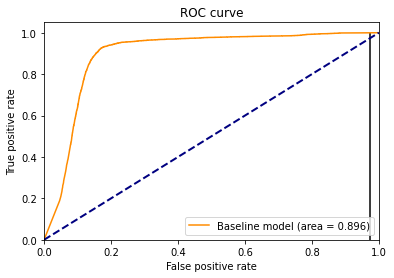

0.8963735356196423

In [3]:
nn.get_roc_curve(net, test_loader, input_size)

In [4]:
torch.save(net.state_dict(), 'model.pkl')

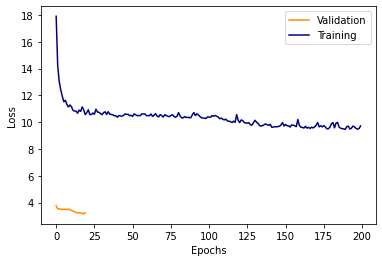

In [5]:
ut.plot_training(hist_val, hist_train)

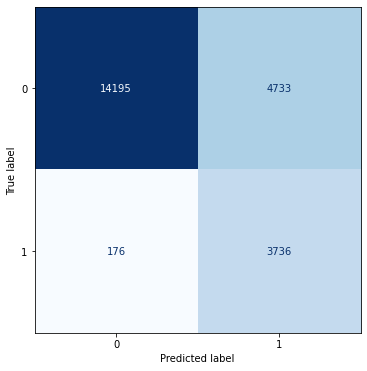

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = probs_test.argmax(1, keepdim = True)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)

In [7]:
#csv_file = open("size_MLP_noise.csv", "a")
#csv_file.write(str(np.asarray(acc_testing))+","+str(np.asarray(acc_training))+","+str(samples)+","+str(epsilon)+","+str(n)+","+str(hidden_size)+"\n")
#csv_file.close()

In [8]:
outputs, intermediates, intermediates2, labels = ut.get_representations(net, train_loader, device)
outputs_test, intermediates_test, intermediates2_test, labels_test = ut.get_representations(net, test_loader, device)

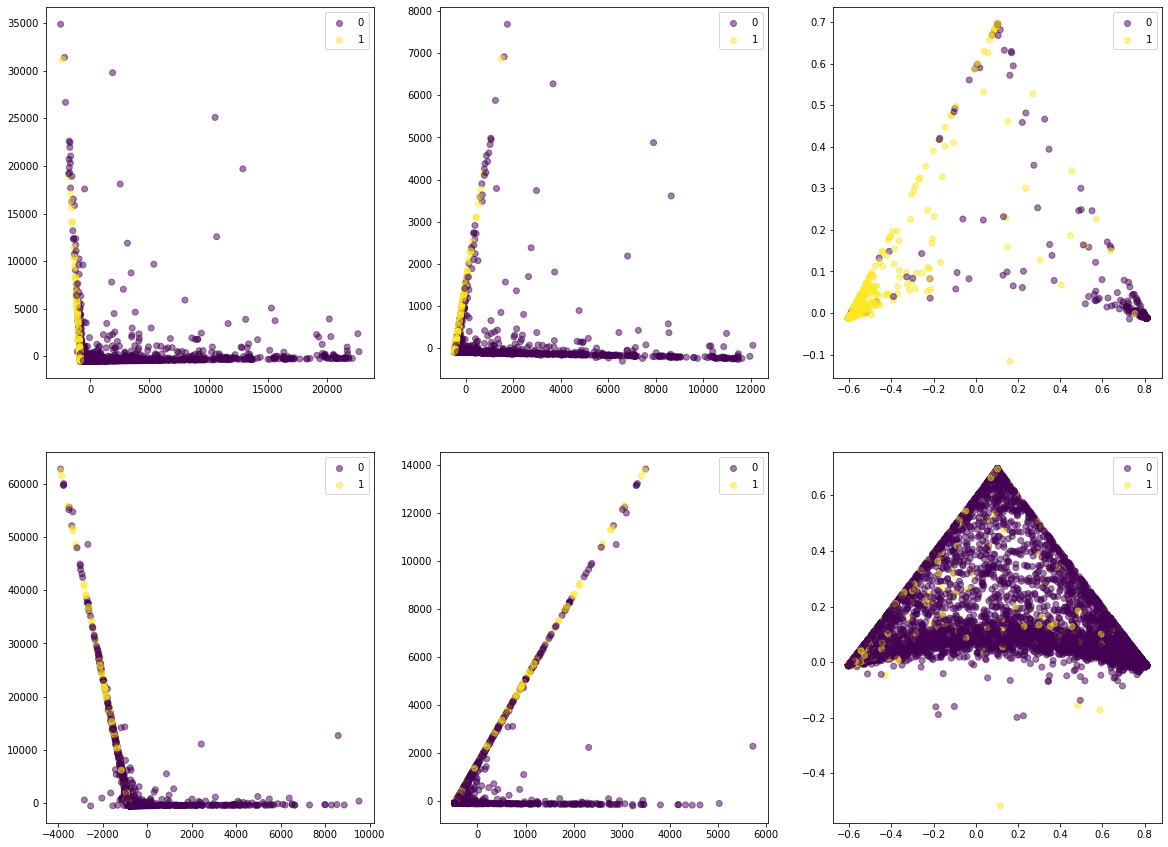

In [9]:
intermediate_pca_data, intermediate_pca_data_test = ut.get_pca(intermediates, data_test=intermediates_test)
fig, axs = plt.subplots(2, 3, figsize=(20,15))
ut.plot_representations(intermediate_pca_data, labels, axs[0, 0])
ut.plot_representations(intermediate_pca_data_test, labels_test, axs[1, 0])
intermediate2_pca_data, intermediate2_pca_data_test = ut.get_pca(intermediates2, data_test=intermediates2_test)
ut.plot_representations(intermediate2_pca_data, labels, axs[0, 1])
ut.plot_representations(intermediate2_pca_data_test, labels_test, axs[1, 1])
output_pca_data, output_pca_data_test = ut.get_pca(outputs, data_test=outputs_test)
ut.plot_representations(output_pca_data, labels, axs[0, 2])
ut.plot_representations(output_pca_data_test, labels_test, axs[1, 2])

first
first ..
first ...


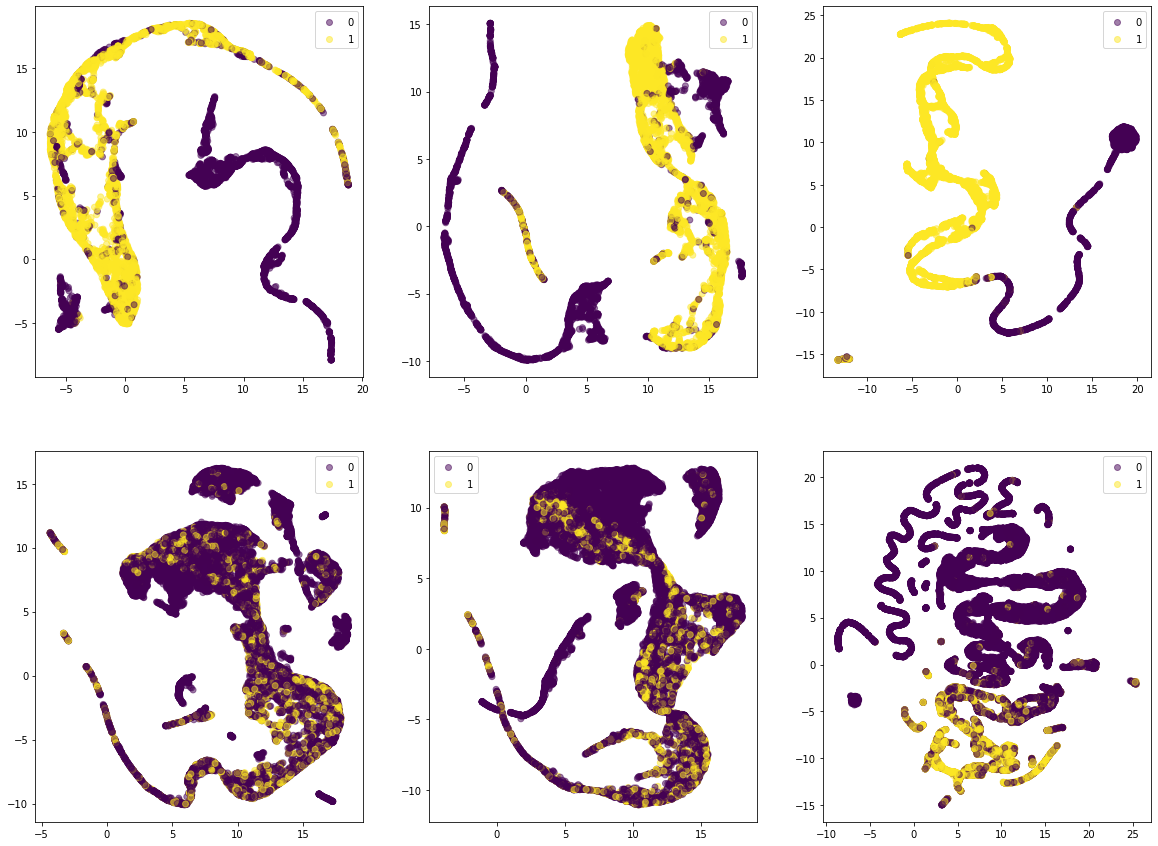

In [10]:
import umap

fig, axs = plt.subplots(2, 3, figsize=(20,15))
print('first')
reducer = umap.UMAP()
print('first ..')
mapper_train = reducer.fit_transform(intermediates.numpy())
print('first ...')
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 0])
ut.plot_representations(mapper_test, labels_test, axs[1, 0])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(intermediates2.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(intermediates2_test.numpy())
ut.plot_representations(mapper_train, labels, axs[0, 1])
ut.plot_representations(mapper_test, labels_test, axs[1, 1])

reducer = umap.UMAP()
mapper_train = reducer.fit_transform(outputs.numpy())
reducer = umap.UMAP()
mapper_test = reducer.fit_transform(outputs_test.numpy())

ut.plot_representations(mapper_train, labels, axs[0, 2])
ut.plot_representations(mapper_test, labels_test, axs[1, 2])

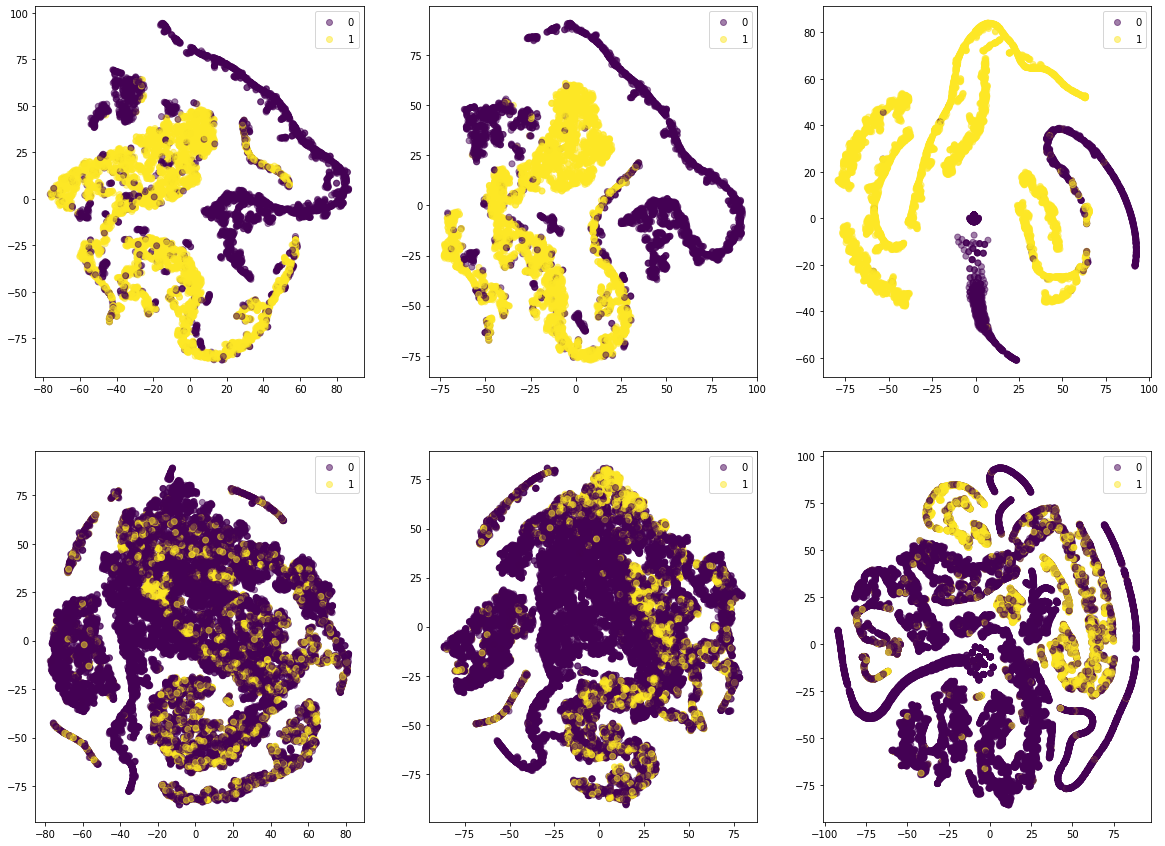

In [11]:
N_CURVES = 25000

fig, axs = plt.subplots(2, 3, figsize=(20,15))
intermediate_tsne_data, intermediate_tsne_data_test = ut.get_tsne(intermediates, data_test= intermediates_test, n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data, labels, axs[0, 0],  n_curves = N_CURVES)
ut.plot_representations(intermediate_tsne_data_test, labels_test, axs[1, 0], n_curves = N_CURVES)

intermediate2_tsne_data, intermediate2_tsne_data_test = ut.get_tsne(intermediates2, data_test=intermediates2_test, n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data, labels, axs[0, 1], n_curves = N_CURVES)
ut.plot_representations(intermediate2_tsne_data_test, labels_test, axs[1, 1], n_curves = N_CURVES)

output_tsne_data, output2_tsne_data_test = ut.get_tsne(outputs, data_test=outputs_test, n_curves = N_CURVES)
ut.plot_representations(output_tsne_data, labels, axs[0, 2], n_curves = N_CURVES)
ut.plot_representations(output2_tsne_data_test, labels_test, axs[1, 2], n_curves = N_CURVES)

In [12]:
#fig, ax = plt.subplots(1, 1, figsize=(15,15))
#curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
#pred_labels = probs_train.argmax(1, keepdim = True)
#ut.plot_confusion_matrix(np.round(labels), pred_labels, ax)


In [13]:
pred_labels

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [0],
        [1]])

In [14]:
curves, labels, probs_train_sample = ut.get_predictions(net, train_loader, device)

In [15]:
#N_WEIGHTS = 25
#weights = net.fc2.weight.data
#plot_weights(weights, N_WEIGHTS)

In [16]:
weights1 = net.fc1.weight.data
w1 = weights1.cpu().numpy().reshape(-1,1)
weights2 = net.fc2.weight.data
w2 = weights2.cpu().numpy().reshape(-1,1)
weights3 = net.fc3.weight.data
w3 = weights3.cpu().numpy().reshape(-1,1)

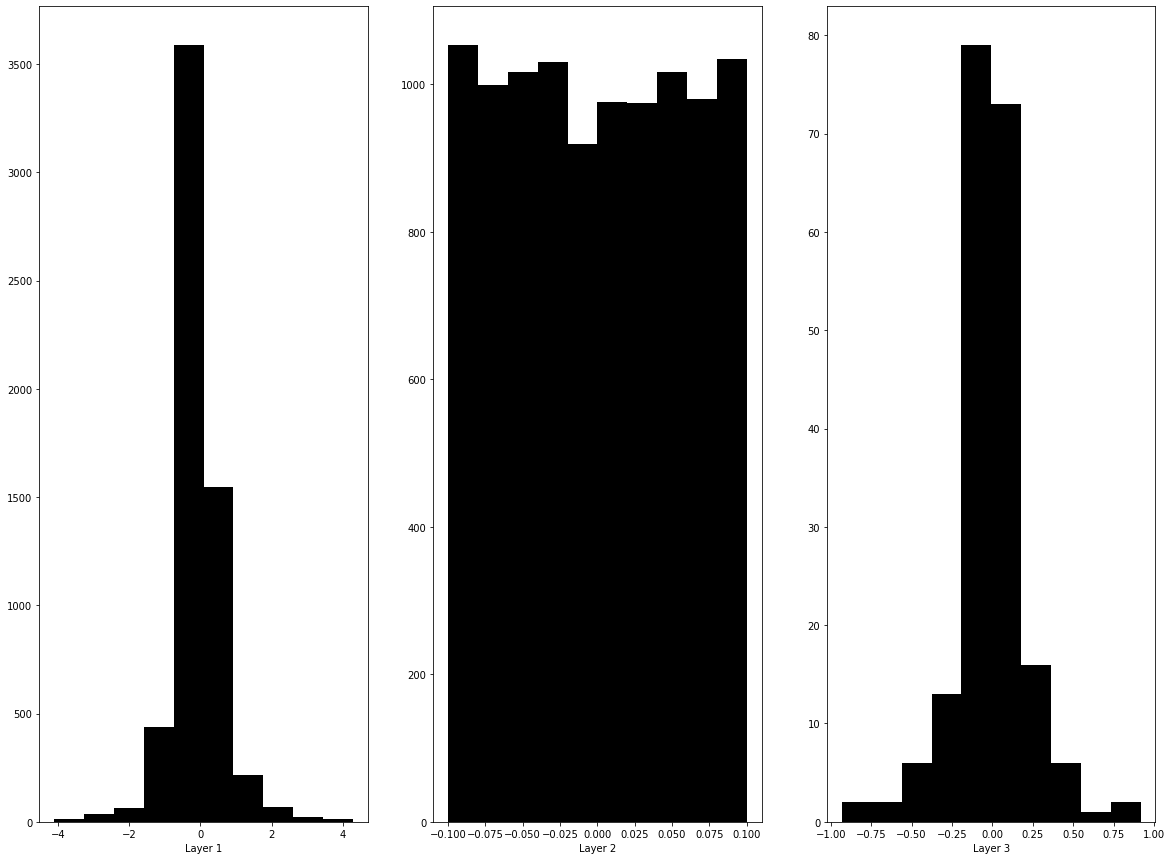

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,15))
ax1.hist(w1, color='black')
ax1.set_xlabel('Layer 1')
ax2.hist(w2, color='black')
ax2.set_xlabel('Layer 2')
ax3.hist(w3, color='black')
ax3.set_xlabel('Layer 3')
plt.show()

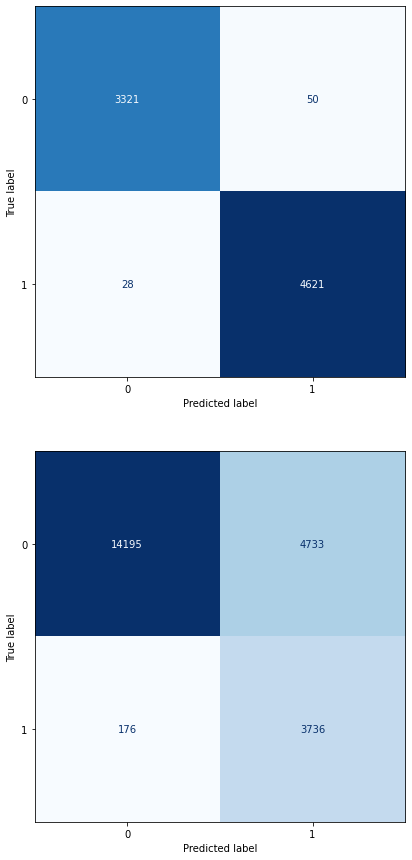

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
curves, labels, probs_train = ut.get_predictions(net, train_loader_pred, device)
pred_labels = torch.argmax(probs_train, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax1)
curves, labels, probs_test = ut.get_predictions(net, test_loader_pred, device)
pred_labels = torch.argmax(probs_test, 1)
ut.plot_confusion_matrix(np.round(labels), pred_labels, ax2)